In [20]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [21]:
data = pd.read_csv('WineQT.csv')
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
976,8.2,0.885,0.20,1.4,0.086,7.0,31.0,0.99460,3.11,0.46,10.0,5,1376
277,8.7,0.765,0.22,2.3,0.064,9.0,42.0,0.99630,3.10,0.55,9.4,5,399
92,7.9,1.040,0.05,2.2,0.084,13.0,29.0,0.99590,3.22,0.55,9.9,6,134
924,6.7,0.860,0.07,2.0,0.100,20.0,57.0,0.99598,3.60,0.74,11.7,6,1301
1003,6.4,0.470,0.40,2.4,0.071,8.0,19.0,0.99630,3.56,0.73,10.6,6,1411


In [22]:
data = data.drop(columns=['Id'])
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:


np.random.seed(113)
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['quality']), data['quality'], test_size=0.3,
                                                    stratify=data['quality'])

In [24]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=y_train,
              xbins=go.histogram.XBins(size=1)))

fig.update_layout(title='Распределение классов',
                    xaxis_title='Класс',
                    yaxis_title='Количество')
fig.show()

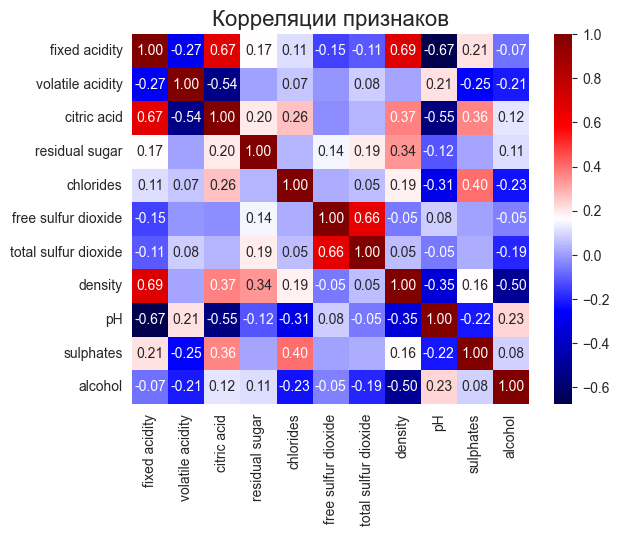

In [41]:
ax = sns.heatmap(X_train.corr(), cmap="seismic",
                 annot=True, fmt="0.2f")
ax.set_title('Корреляции признаков', size=16)
for t in ax.texts:
    if abs(float(t.get_text())) >= 0.05:
        t.set_text(t.get_text())
    else:
        t.set_text("")

In [54]:
rmse_per_column = X_train.apply(lambda x: np.std(x)/np.mean(x))

print(rmse_per_column)
print('\nКолонки с низким распределением')
print(rmse_per_column[rmse_per_column<0.01])

fixed acidity           0.211820
volatile acidity        0.335419
citric acid             0.728707
residual sugar          0.485478
chlorides               0.573264
free sulfur dioxide     0.646353
total sulfur dioxide    0.715347
density                 0.001920
pH                      0.047219
sulphates               0.267407
alcohol                 0.103024
dtype: float64

Колонки с низким распределением
density    0.00192
dtype: float64


In [27]:
def add_params(X):
    X['total_acid'] = X['fixed acidity'] + X['volatile acidity'] + X['citric acid']
    X['sulphates/acid'] = X['sulphates'] / X['volatile acidity']
    X['sulphates/chlorines'] = X['sulphates'] / X['chlorides']
    X['sulphates*alcohol'] = X['sulphates'] * X['alcohol']
    return X

def mod_dataset(dataset: pd.DataFrame()):
    dataset = dataset.drop(columns=['density'])
    dataset = add_params(dataset)
    return dataset

In [28]:
X_train_mod = mod_dataset(X_train)
X_test_mod = mod_dataset(X_test)
X_train.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
462,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9
693,7.1,0.360,0.30,1.6,0.080,35.0,70.0,0.99693,3.44,0.50,9.4
259,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0
333,9.6,0.540,0.42,2.4,0.081,25.0,52.0,0.99700,3.20,0.71,11.4


In [35]:
X_train_mod.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,total_acid,sulphates/acid,sulphates/chlorines,sulphates*alcohol
494,7.0,0.650,0.02,2.1,0.066,8.0,25.0,3.47,0.67,9.5,7.670,1.030769,10.151515,6.365
522,7.3,0.835,0.03,2.1,0.092,10.0,19.0,3.39,0.47,9.6,8.165,0.562874,5.108696,4.512
377,10.3,0.270,0.24,2.1,0.072,15.0,33.0,3.22,0.66,12.8,10.810,2.444444,9.166667,8.448
62,7.0,0.620,0.08,1.8,0.076,8.0,24.0,3.48,0.53,9.0,7.700,0.854839,6.973684,4.770
901,7.5,0.580,0.20,2.0,0.073,34.0,44.0,3.10,0.43,9.3,8.280,0.741379,5.890411,3.999


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_mod)
X_test_std = scaler.transform(X_test_mod)

In [36]:
from sklearn.metrics import accuracy_score, f1_score, classification_report


def train_eval_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, f1

In [49]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.simplefilter('ignore', category=ConvergenceWarning)

weights = {cl: w for cl, w in zip(np.unique(y_train), compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train))}

results_stock = pd.DataFrame({'model_name': [], 'test_acc': [], 'test_f1': []})
results_mod = pd.DataFrame({'model_name': [], 'test_acc': [], 'test_f1': []})
results_mod_normalised = pd.DataFrame({'model_name': [], 'test_acc': [], 'test_f1': []})



for model in [SVC( class_weight=weights), RidgeClassifier(max_iter=5000, class_weight=weights), LogisticRegression(max_iter=5000, class_weight=weights), CatBoostClassifier(silent=True, class_weights=weights)]:
    acc, f1 = train_eval_model(model, X_train, X_test, y_train, y_test)
    results_stock.loc[len(results_stock)] = [type(model).__name__, acc, f1]


for model in [SVC( class_weight=weights), RidgeClassifier(max_iter=5000, class_weight=weights), LogisticRegression(max_iter=5000, class_weight=weights), CatBoostClassifier(silent=True, class_weights=weights)]:
    acc, f1 = train_eval_model(model, X_train_mod, X_test_mod, y_train, y_test)
    results_mod.loc[len(results_mod)] = [type(model).__name__, acc, f1]
    
for model in [SVC( class_weight=weights), RidgeClassifier(max_iter=5000, class_weight=weights), LogisticRegression(max_iter=5000, class_weight=weights), CatBoostClassifier(silent=True, class_weights=weights)]:
    acc, f1 = train_eval_model(model, X_train_std, X_test_std, y_train, y_test)
    results_mod_normalised.loc[len(results_mod_normalised)] = [type(model).__name__, acc, f1]


results_stock

,model_name,test_acc,test_f1
0,SVC,0.244898,0.319705
1,RidgeClassifier,0.314869,0.343185
2,LogisticRegression,0.396501,0.450127
3,CatBoostClassifier,0.629738,0.620658


In [51]:
results_mod

,model_name,test_acc,test_f1
0,SVC,0.309038,0.388009
1,RidgeClassifier,0.314869,0.344967
2,LogisticRegression,0.370262,0.423387
3,CatBoostClassifier,0.629738,0.620908


In [52]:
results_mod_normalised

,model_name,test_acc,test_f1
0,SVC,0.504373,0.524377
1,RidgeClassifier,0.306122,0.337495
2,LogisticRegression,0.425656,0.475940
3,CatBoostClassifier,0.629738,0.620908


In [34]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.71      0.70      0.70       145
           6       0.61      0.64      0.62       138
           7       0.53      0.63      0.57        43
           8       0.00      0.00      0.00         5

    accuracy                           0.63       343
   macro avg       0.31      0.33      0.32       343
weighted avg       0.61      0.63      0.62       343
